<a href="https://colab.research.google.com/github/juli-amezquita/recommender-systems/blob/main/Modelo_Sistema_Recomendador_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema Recomendador para Planes de Formación y Objetivos de Desarrollo Empresarial

## Modelo

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from unicodedata import normalize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Carga de datos

In [ ]:
url_en = 'https://github.com/juli-amezquita/recommender-systems/blob/main/clean%20datasets/en_courses_9categories.csv?raw=true'
data = pd.read_csv(url_en)
data.head()

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category,languages
0,1,tableau a z hands on tableau training for data...,learn tableau for data science step by step re...,211674,4.6,55582,https://www.udemy.com/course/tableau10/,Business,en
1,2,pmp exam prep seminar pmbok guide,pmp exam prep seminar earn pdus by completing ...,157957,4.6,53858,https://www.udemy.com/course/pmp-pmbok6-35-pdus/,Business,en
2,3,the complete financial analyst course,excel accounting financial statement analysis ...,249097,4.5,47415,https://www.udemy.com/course/the-complete-fina...,Business,en
3,4,an entire mba in course award winning business...,best selling business course everything you n...,376913,4.5,42101,https://www.udemy.com/course/an-entire-mba-in-...,Business,en
4,5,microsoft power bi a complete introduction edi...,learn how to use microsoft s power bi tools in...,126880,4.6,38771,https://www.udemy.com/course/powerbi-complete-...,Business,en


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23771 entries, 0 to 23770
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       23771 non-null  int64  
 1   Title       23768 non-null  object 
 2   Summary     23771 non-null  object 
 3   Enrollment  23771 non-null  int64  
 4   Stars       23771 non-null  float64
 5   Rating      23771 non-null  int64  
 6   Link        23771 non-null  object 
 7   Category    23771 non-null  object 
 8   languages   23771 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.6+ MB


Revisamos nulos

In [ ]:
print(data.isna().sum())

index         0
Title         3
Summary       0
Enrollment    0
Stars         0
Rating        0
Link          0
Category      0
languages     0
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
print(data.isna().sum())

index         0
Title         0
Summary       0
Enrollment    0
Stars         0
Rating        0
Link          0
Category      0
languages     0
dtype: int64


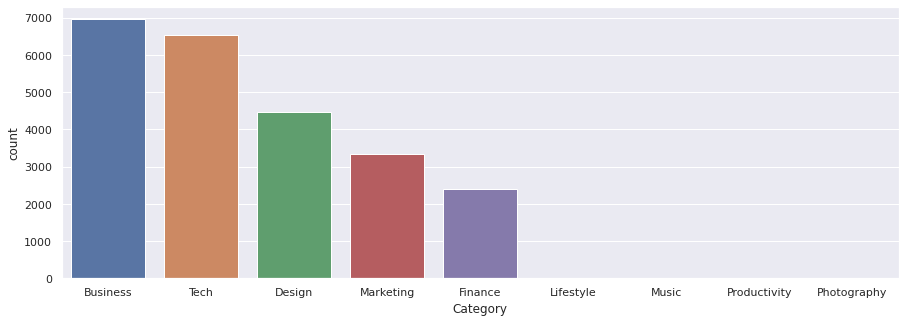

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data = data, x= "Category", order = data["Category"].value_counts().index)
plt.show()

In [ ]:
data.iloc[12345].Title

'stock options learn to trade'

In [ ]:
data.iloc[12345].Summary

'stock option trading for beginners'

In [ ]:
print(data.iloc[12345])

index                                                      1237
Title                              stock options learn to trade
Summary                      stock option trading for beginners
Enrollment                                                 1764
Stars                                                       4.2
Rating                                                       33
Link          https://www.udemy.com/course/options-trading-b...
Category                                                Finance
languages                                                    en
Name: 12346, dtype: object


# Stopwords

In [ ]:
#!pip install nltk

In [ ]:
import nltk

In [ ]:
# se descarga la lista de stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = list(stopwords.words('english'))
# se imprime la lista de stopwords de nltk
print(len(stop_words))
print(list(stop_words))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [ ]:
# agregamos stopwords nuevas a la lista

new_stop_words = ['course' ,'learn' ,'using' ,'full' ,'use' ,'start' ,'want' ,'hour' ,'hours' ,'top' ,'become' ,'amazing' ,'step' ,'steps' ,'find' ,'make' ,'take' ,'need' ,'great' ,'know' ,'az' ,'create' ,
                   'build' ,'building' ,"way" ,"ways" ,"like" ,"–" ,"follow" ,"easy" ,"best" ,"time" ,"complete" ,"creating" ,"guide" ,"level" ,"would" ,"end" ,"fully" ,"awesome" ,"day" ,"today" ,"non"]
for w in new_stop_words:
    stop_words.append(w)

print(len(stop_words))

222


In [ ]:
%%time
# Se remueven las stopwords del campo Summary
data['Summary'] = data['Summary'].apply(lambda x: " ".join([t for t in x.split() if t not in stop_words]))

CPU times: user 1.7 s, sys: 17.2 ms, total: 1.72 s
Wall time: 2.4 s


In [ ]:
data.iloc[12345].Summary

'stock option trading beginners'

# Conteo de palabras

### Palabras en el summary

In [ ]:
data['palabras_summary'] = data['Summary'].apply(lambda x: len( x.split() ))

In [ ]:
data.head()

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category,languages,palabras_summary
0,1,tableau a z hands on tableau training for data...,tableau data science real life data analytics ...,211674,4.6,55582,https://www.udemy.com/course/tableau10/,Business,en,10
1,2,pmp exam prep seminar pmbok guide,pmp exam prep seminar earn pdus completing ent...,157957,4.6,53858,https://www.udemy.com/course/pmp-pmbok6-35-pdus/,Business,en,9
2,3,the complete financial analyst course,excel accounting financial statement analysis ...,249097,4.5,47415,https://www.udemy.com/course/the-complete-fina...,Business,en,12
3,4,an entire mba in course award winning business...,selling business everything business ipo,376913,4.5,42101,https://www.udemy.com/course/an-entire-mba-in-...,Business,en,5
4,5,microsoft power bi a complete introduction edi...,microsoft power bi tools including power bi de...,126880,4.6,38771,https://www.udemy.com/course/powerbi-complete-...,Business,en,14


In [ ]:
# Total palabras en summary
print('Total de palabras en el campo summary:', data.palabras_summary.sum())

Total de palabras en el campo summary: 191268


In [ ]:
from itertools import chain
# chain toma una lista de listas y las concatena
# ej: chain(*[[1,1], [2], [3,3]])  -> [1, 1, 2, 3, 3]

In [ ]:
# Total de palabras unicas en summary
unique_words = set(chain(*data.Summary.str.split().values))  # set() crea un conjunto de elementos unicos
print('Total de palabras unicas en el campo summary:', len(unique_words))

Total de palabras unicas en el campo summary: 13456


In [ ]:
print('Mínimo de palabras en el summary de un curso:',data.palabras_summary.min())
print('Máximo de palabras en el summary de un curso:',data.palabras_summary.max())
print('Promedio de palabras en el summary de un curso:',data.palabras_summary.mean())

Mínimo de palabras en el summary de un curso: 0
Máximo de palabras en el summary de un curso: 20
Promedio de palabras en el summary de un curso: 8.047290474587681


In [ ]:
data[data.palabras_summary == 0]

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category,languages,palabras_summary
4593,6202,how to conduct effective performance evaluations,,46,4.1,19,https://www.udemy.com/course/how-to-conduct-ef...,Business,en,0
5279,7317,behavioral finance why people are bad with money,,1049,4.1,12,https://www.udemy.com/course/behavioral-financ...,Business,en,0
12755,1942,behavioral finance why people are bad with money,,1049,4.1,12,https://www.udemy.com/course/behavioral-financ...,Finance,en,0
20271,3854,build a social network using node js and mongodb,,3899,4.6,104,https://www.udemy.com/course/build-a-social-ne...,Tech,en,0


In [ ]:
# Vamos a tomar solo los registros con campo summary
data = data[data.palabras_summary > 0]

<AxesSubplot:xlabel='palabras_summary', ylabel='Count'>

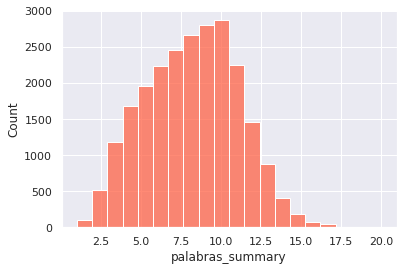

In [ ]:
sns.histplot(data= data, x ='palabras_summary', color= 'tomato', bins = 20, kde=False)

In [ ]:
una = data[data.palabras_summary == 1]
una.head()

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category,languages,palabras_summary
901,919,deliver your project master project management,budget,2061,4.6,481,https://www.udemy.com/course/deliver-your-proj...,Business,en,1
1409,1507,photoshop basics for beginners,icons,28653,4.3,230,https://www.udemy.com/course/-mobile-app-design/,Business,en,1
1770,1976,learn hubspot crm from scratch,beginners,1972,4.1,153,https://www.udemy.com/course/learn-hubspot-crm...,Business,en,1
1817,2035,how to find shippers,shippers,732,4.7,146,https://www.udemy.com/course/shippers/,Business,en,1
2307,2694,online course essentials online course as fast...,online,22791,4.3,90,https://www.udemy.com/course/online-course-ess...,Business,en,1


In [ ]:
una.shape

(103, 10)

### Palabras en el título

In [ ]:
data['palabras_title'] = data['Title'].apply(lambda x: len(str(x).split()))

In [ ]:
data.head()

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category,languages,palabras_summary,palabras_title
0,1,tableau a z hands on tableau training for data...,tableau data science real life data analytics ...,211674,4.6,55582,https://www.udemy.com/course/tableau10/,Business,en,10,10
1,2,pmp exam prep seminar pmbok guide,pmp exam prep seminar earn pdus completing ent...,157957,4.6,53858,https://www.udemy.com/course/pmp-pmbok6-35-pdus/,Business,en,9,6
2,3,the complete financial analyst course,excel accounting financial statement analysis ...,249097,4.5,47415,https://www.udemy.com/course/the-complete-fina...,Business,en,12,5
3,4,an entire mba in course award winning business...,selling business everything business ipo,376913,4.5,42101,https://www.udemy.com/course/an-entire-mba-in-...,Business,en,5,10
4,5,microsoft power bi a complete introduction edi...,microsoft power bi tools including power bi de...,126880,4.6,38771,https://www.udemy.com/course/powerbi-complete-...,Business,en,14,7


In [ ]:
# Total palabras en title
print('Total de palabras en el campo title:', data.palabras_title.sum())

Total de palabras en el campo title: 160972


In [ ]:
print('Mínimo de palabras en el título de un curso:', data.palabras_title.min())
print('Máximo de palabras en el título de un curso:', data.palabras_title.max())
print('Promedio de palabras en el título de un curso:', data.palabras_title.mean())

Mínimo de palabras en el título de un curso: 0
Máximo de palabras en el título de un curso: 15
Promedio de palabras en el título de un curso: 6.77377545867699


<AxesSubplot:xlabel='palabras_title', ylabel='Count'>

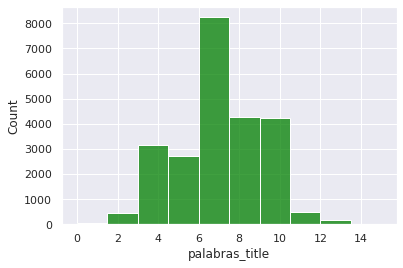

In [ ]:
sns.histplot(data= data, x ='palabras_title', color= 'green', bins = 10, kde=False)

In [ ]:
# data[data.palabras_title == 1]

### Se eliminan todas las descripciones que tienen 1 palabra en el campo Summary

In [ ]:
data = data[(data.palabras_summary > 1)]

<AxesSubplot:xlabel='palabras_summary', ylabel='Count'>

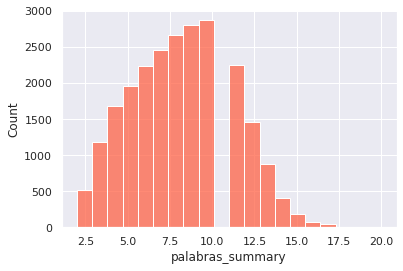

In [ ]:
sns.histplot(data= data, x ='palabras_summary', color= 'tomato', bins = 20, kde=False)

In [ ]:
data.shape

(23661, 11)

### Eliminamos los cursos duplicados

In [ ]:
data = data.drop_duplicates(subset=['Title'], keep="last")

In [ ]:
data.shape

(21635, 11)

# Las palabras más frecuentes

In [ ]:
#!pip install contexto

In [ ]:
# Se crea una variable 'texto' que nos permite juntar el texto de todos los summary en uno solo
texto = ' '.join(data['Summary'])
#texto

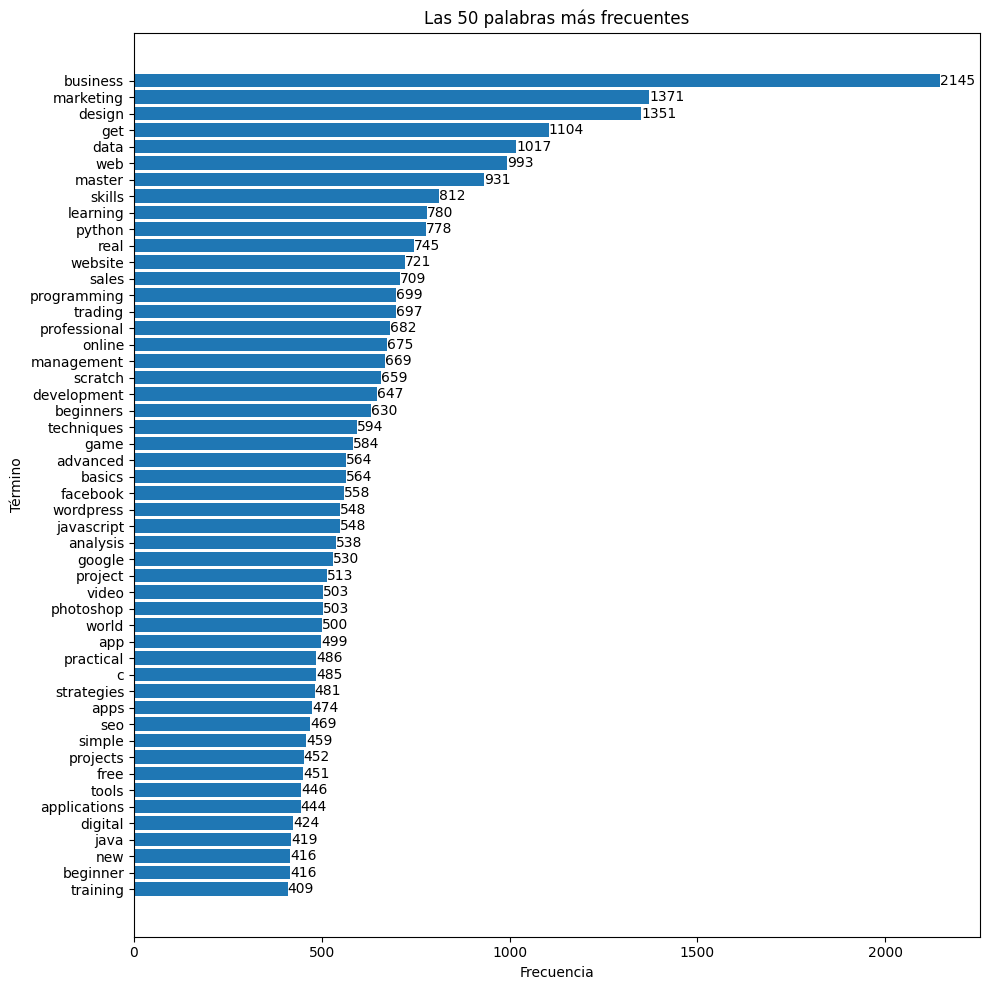

In [ ]:
from contexto.exploracion import grafica_barchart_frecuencias

grafica_barchart_frecuencias(texto, titulo='Las 50 palabras más frecuentes', dim_figura=(10,10), n_terminos=50, ubicacion_archivo='barras_palabras.jpg')

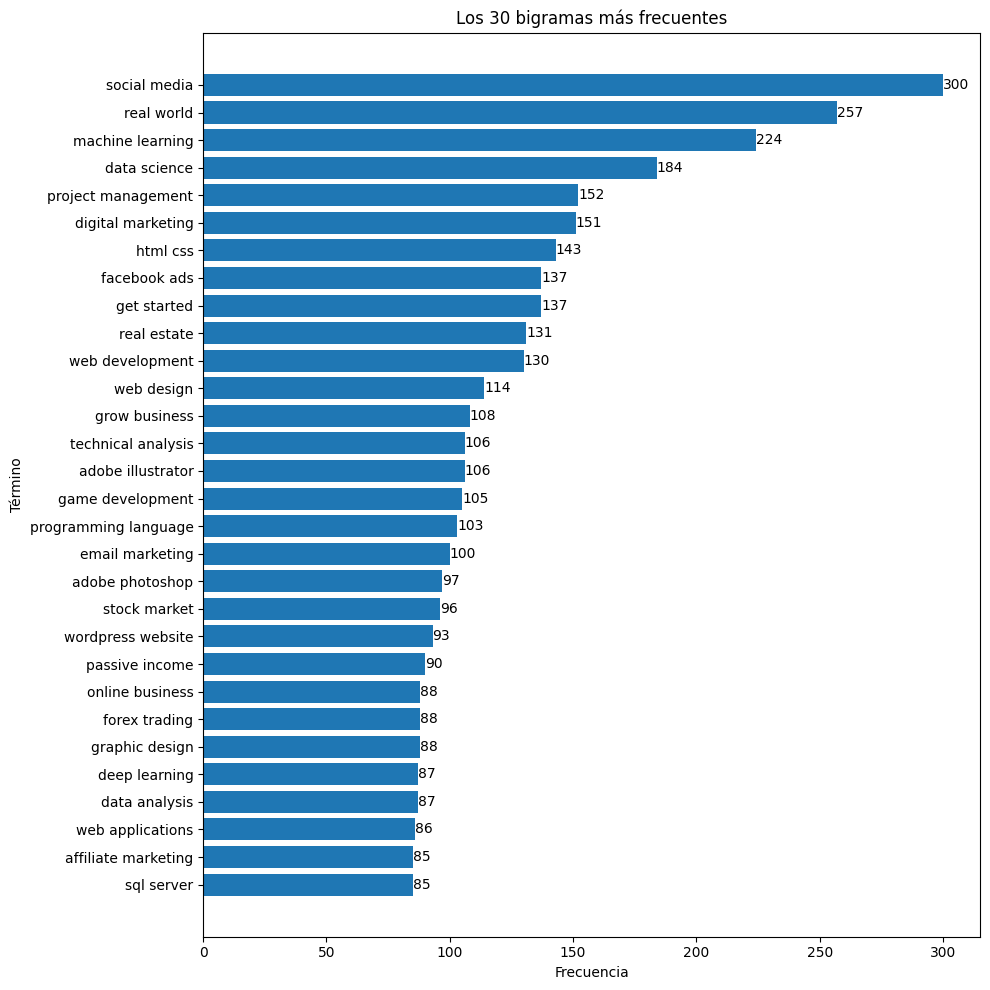

In [ ]:
grafica_barchart_frecuencias(texto,  n_grama=2, titulo='Los 30 bigramas más frecuentes', dim_figura=(10,10), n_terminos=30, ubicacion_archivo='bigramas_barras_palabras.jpg')

# Se carga el modelo mediano de inglés de Spacy

In [ ]:
#!python -m spacy download en_core_web_md

# Lematización

In [ ]:
import spacy 
import en_core_web_md

# Se carga el modelo mediano de inglés
nlp = en_core_web_md.load()

In [ ]:
def lemmatization(texts, allowed=['NOUN', 'ADJ', 'ADV', 'VERB']): 
    texts_out = [token.text for token in nlp(texts) if token.pos_ in 
                 allowed and token.text and len(token.text)>2]
    return texts_out

In [ ]:
%%time
# Se aplica la función lemmatization sobre el campo summary
data['Summary'] = data['Summary'].apply(lambda x: lemmatization(x))

CPU times: user 2min 36s, sys: 584 ms, total: 2min 36s
Wall time: 2min 38s


In [ ]:
data.shape

(21635, 11)

In [ ]:
data.iloc[250].Title

'six sigma yellow belt masterclass includes a yb project '

In [ ]:
data.iloc[250].Summary

['get',
 'sigma',
 'certification',
 'online',
 'realistic',
 'yellow',
 'belt',
 'project',
 'tools']

# Bigramas 

Creo Bigramas para correr el modelo no solo con los unigramas más frecuentes sino también considerar pares de palabras más frecuentes. Ya que hace más sentido. 

In [ ]:
import gensim

bigram = gensim.models.Phrases(data['Summary'])

Creamos los bigramas, como el diccionario `bigram` devuelve las palabras unidas por un `_` lo cambiamos por un espacio en blanco, mantenemos las palabras también y usamos `set(...)` para eliminar duplicados

In [ ]:
texts = [list(set([word.replace('_', ' ') for word in bigram[line]] + line)) for line in data['Summary']]
texts[0]

['quizzes',
 'data analytics',
 'real life',
 'exercises quizzes',
 'life',
 'science',
 'analytics',
 'included',
 'real',
 'exercises',
 'data']

# Preparar el corpus

In [ ]:
#!pip install python-Levenshtein

# Diccionario

Creo un diccionario de palabras

In [ ]:
from gensim.corpora import Dictionary

# Se instancia y se define nuestro diccionario
dictionary = Dictionary(texts)
dictionary.compactify()

# Gensim filter_extremes
# Filtra los tokens que aparecen en menos de 50 documentos (número absoluto) o más del 0.97 documentos(fracción del tamaño total del corpus)
# después de los dos pasos anteriores, conserva todos los tokens más frecuentes.
dictionary.filter_extremes(no_below=50, no_above=0.97, keep_n=None)
dictionary.compactify()

# Para cada documento creamos un diccionario que informa cuántas palabras y cuántas veces aparecen esas palabras (doc2bow)
# Hace un mapeo entre las palabras y su respectiva identificación con un vector de números
bow_corpus = [dictionary.doc2bow(text) for text in texts]


como se ve la descripción del curso 250

In [ ]:
print(texts[250], '\n', bow_corpus[250])

['tools', 'online', 'project', 'belt', 'sigma', 'yellow belt', 'yellow', 'certification', 'get', 'realistic'] 
 [(16, 1), (20, 1), (24, 1), (123, 1), (199, 1), (371, 1)]


# Modelo TF-IDF

### A continuación, se crea un modelo TF-IDF utilizando el módulo "models" de Gensim (TfidfModel) sobre "bow_corpus", luego se aplica la transformación a todo el corpus. Con TF-IDF estoy sacando las palabras más relevantes

In [ ]:
from gensim.models import TfidfModel

tfidf = TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

como se ve la descripción del curso 250 después de aplicar TF-IDF

In [ ]:
corpus_tfidf[250]

[(16, 0.3779245941044253),
 (20, 0.32120066423723753),
 (24, 0.38646203265883644),
 (123, 0.34602729442017616),
 (199, 0.4571095616226105),
 (371, 0.525324844231834)]

# Modelo LDA

### Aplico modelo LDA para sacar un listado de temas

In [ ]:
# Se importan los modelos
from gensim.models import CoherenceModel, LdaModel

Los parámetros a utilizar en el modelo son: 

* num_topics es el número de temas latentes (ocultos) solicitados para ser extraídos del corpus de entrenamiento, es un parámetro que debe ser suministrado por el analista
* minimum_probability es el umbral con el que se filtran los temas 
* update_every es el número de documentos que se van a iterar para cada actualización. Se establece en 1 para el aprendizaje iterativo en línea
* passes es el número de pasadas por el corpus durante el entrenamiento
* alfa es el parámentro de la distribución Dirichlet de los temas por documenento. Un alfa bajo significa que la distribución de los temas por cada documentos será uniforme (homogenea), y viceversa 
* eta es el parámetro de la distribución Dirichlet de las palabras por tema. Un eta bajo significa que cada tema está representado solo por una pequeña cantidad de palabras, y viceversa

In [ ]:
%%time

ldamodel = LdaModel(corpus_tfidf, num_topics=25, id2word=dictionary, minimum_probability=0.01, random_state=123, update_every=1, passes=2, alpha=.1, eta=.01)

CPU times: user 8.98 s, sys: 70 ms, total: 9.05 s
Wall time: 9.09 s


In [ ]:
topics_lda = ldamodel.show_topics()
for topic in topics_lda:
    print(topic)

(15, '0.169*"language" + 0.078*"latest" + 0.074*"power" + 0.059*"understanding" + 0.059*"accounting" + 0.057*"better" + 0.044*"version" + 0.044*"processing" + 0.040*"service" + 0.038*"job"')
(7, '0.132*"web" + 0.113*"scratch" + 0.098*"coding" + 0.063*"websites" + 0.045*"responsive" + 0.036*"web applications" + 0.034*"development" + 0.033*"applications" + 0.032*"blog" + 0.031*"store"')
(16, '0.189*"developer" + 0.114*"testing" + 0.072*"dynamic" + 0.056*"financial" + 0.053*"income" + 0.051*"dive" + 0.038*"personal" + 0.034*"never" + 0.030*"setting" + 0.027*"stocks"')
(5, '0.181*"application" + 0.147*"website" + 0.111*"wordpress" + 0.054*"computer" + 0.050*"set" + 0.049*"professional" + 0.044*"methods" + 0.038*"less" + 0.038*"students" + 0.034*"wordpress website"')
(6, '0.107*"system" + 0.101*"understand" + 0.095*"examples" + 0.082*"powerful" + 0.078*"basic" + 0.058*"advance" + 0.042*"practical" + 0.039*"complex" + 0.032*"show" + 0.031*"essentials"')
(8, '0.147*"applications" + 0.078*"fea

In [ ]:
# Mostramos los temas en un dataframe
word_dict = {};
for i in range(0,25):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict['Topic# ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.set_option('max_columns', None)  
df_topic = pd.DataFrame(word_dict)
df_topic


,Topic# 01,Topic# 02,Topic# 03,Topic# 04,Topic# 05,Topic# 06,Topic# 07,Topic# 08,Topic# 09,Topic# 10,Topic# 11,Topic# 12,Topic# 13,Topic# 14,Topic# 15,Topic# 16,Topic# 17,Topic# 18,Topic# 19,Topic# 20,Topic# 21,Topic# 22,Topic# 23,Topic# 24,Topic# 25
0,world,game,apps,work,development,application,system,web,applications,code,programming,platform,marketing,basics,hands,language,developer,skills,javascript,expert,mobile,fundamentals,beginner,app,object
1,real,develop,games,program,write,website,understand,scratch,features,core,python,automation,seo,beginners,introduction,latest,testing,improve,learning,market,next,first,software,machine,animation
2,real world,bootstrap,api,designed,deep,wordpress,examples,coding,test,concepts,data,video,social,framework,mysql,power,dynamic,implement,projects,trading,explore,secure,advanced,machine learning,project
3,modern,pro,deploy,working,help,computer,powerful,websites,includes,algorithms,database,depth,media,fast,functional,understanding,financial,much,based,services,training,patterns,beautiful,new,right
4,studio,interactive,visual,leverage,deep learning,set,basic,responsive,questions,design,sql,efficient,email,started,user,accounting,income,performance,easily,comprehensive,writing,custom,models,quickly,animations
5,tutorial,databases,approach,professionals,effective,professional,advance,web applications,developing,made,server,analysis,videos,content,driven,better,dive,high,manage,sell,pages,setup,site,learning,effects
6,knowledge,development,used,digital,learning,methods,practical,development,many,multiple,science,big,social media,developers,exercises,version,personal,earn,web,strategies,source,let,online,process,ready
7,ads,live,photoshop,files,networks,less,complex,applications,industry,sql server,net,teach,youtube,page,fun,processing,never,running,desktop,products,clients,problems,master,popular,apply
8,ultimate,important,web,launch,topics,students,show,blog,exam,teaches,data science,covers,stack,including,solutions,service,setting,portfolio,modeling,gain,secrets,programs,front,tool,image
9,quick,systems,skill,standard,neural,wordpress website,essentials,store,environment,certified,analytics,options,traffic,model,life,job,stocks,needed,scratch,profitable,style,people,beginner advanced,increase,quality


# Puntuación de Coherecia

Utilizo la puntuación de coherencia para determinar el número óptimo de temas.

In [ ]:
def compute_coherence_values(dictionary, corpus_tfidf, texts, limit):
    coherence_values = []
    model_list = []
    for num_topics in range(1, limit):
        model=LdaModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics, minimum_probability=0.01, random_state=42, update_every=1, passes=2, alpha=1e-2, eta=0.5e-2) # entrenar modelo LDA
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') # cálculo de la coherencia
        coherence_values.append(coherencemodel.get_coherence())
    
    # graficamos
    x = range(1, limit)
    plt.plot(x, coherence_values)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
    return model_list, coherence_values

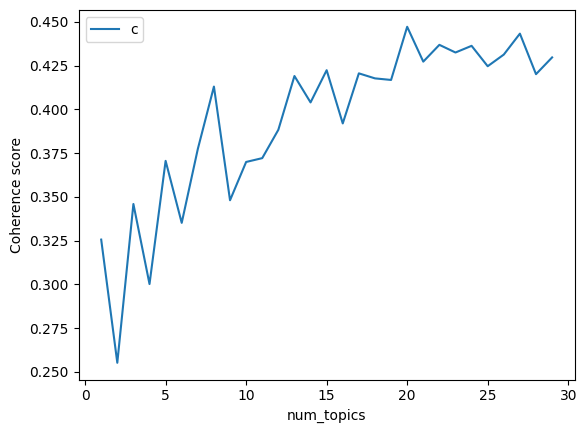

CPU times: user 5min 6s, sys: 3.56 s, total: 5min 10s
Wall time: 5min 9s


In [ ]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus_tfidf=corpus_tfidf , texts = texts, limit=30)


### El número óptimo de temas fue 20, ya que es el que tiene mejor puntaje de coherencia

In [ ]:
# # Aplico de nuevo el modelo LDA con los 20 temas 

coherence_ldamodel = model_list[20]
word_dict = {};
for i in range(0,20):
  words = coherence_ldamodel.show_topic(i, topn = 15)
  word_dict['Topic# ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.set_option('max_columns', None)  
pd.DataFrame(word_dict)

,Topic# 01,Topic# 02,Topic# 03,Topic# 04,Topic# 05,Topic# 06,Topic# 07,Topic# 08,Topic# 09,Topic# 10,Topic# 11,Topic# 12,Topic# 13,Topic# 14,Topic# 15,Topic# 16,Topic# 17,Topic# 18,Topic# 19,Topic# 20
0,javascript,program,social,including,app,programming,apps,server,python,games,quickly,developer,hands,ultimate,learning,tutorial,application,mysql,ads,real
1,website,developers,media,practices,mobile,language,game,core,applications,oriented,started,features,power,income,machine,quick,code,introduction,sales,world
2,wordpress,services,social media,industry,expert,advanced,development,data,basics,implement,fundamentals,platform,stack,model,machine learning,project,studio,making,visual,real world
3,modern,set,animation,analytics,deep,beginner,api,sql,automation,functions,fast,bootstrap,library,high,photoshop,concepts,interactive,databases,marketing,first
4,websites,made,seo,architecture,trading,functional,deploy,testing,comprehensive,customers,easily,software,beautiful,quality,efficient,methods,pro,search,site,examples
5,object,big,marketing,service,deep learning,basic,web,science,explore,options,videos,next,blog,pages,python,beginners,art,understanding,secure,net
6,store,processing,tool,plan,includes,write,youtube,data science,system,network,content,user,practice,topics,run,apply,desktop,projects,approach,applications
7,web,analysis,animations,research,market,master,popular,developing,programming,designed,advance,based,results,useful,instagram,knowledge,teach,accounting,generate,web applications
8,dynamic,neural,effects,customer,stock,techniques,live,computer,complex,better,financial,digital,successful,cost,stunning,systems,covers,patterns,email,page
9,professional,modeling,graphics,secrets,version,beginner advanced,latest,grow,exercises,connect,basic,interview,part,low,masterclass,class,develop,automate,affiliate,web


Revisemos de qué temas se compone el curso 250

In [ ]:
data.iloc[250].Title

'six sigma yellow belt masterclass includes a yb project '

In [ ]:
data.iloc[250].Summary

['get',
 'sigma',
 'certification',
 'online',
 'realistic',
 'yellow',
 'belt',
 'project',
 'tools']

In [ ]:
corpus_ldamodel = coherence_ldamodel[corpus_tfidf]
for course in corpus_ldamodel[250]:
    print(course)

(1, 0.92377836)


### Con la librería pyLDAvis reviso la distribucicón de las palabras por tema 

In [ ]:
 #!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

lda_display = pyLDAvis.gensim_models.prepare(coherence_ldamodel, corpus_tfidf, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# Función para el recomendador 

Se crea una matriz de similitud, haciendo el cálculo de la similitud del coseno, que utilizaremos para comparar los vectores de temas asignados y sus coherencias de acuerdo a la descripción de cada curso.

In [ ]:
from gensim import similarities
sim_mat = similarities.MatrixSimilarity(coherence_ldamodel[corpus_tfidf])

### Convierto la variable Title en una lista

In [ ]:
course_title = data["Title"]
course_title = list(course_title)
# course_title

### Defino la función del recomendador

In [ ]:
def course_recommender(skill):

    recommendation_scores = []

    for i in range(len(texts)):
         
        if skill in texts[i]:  #  vamos a chequear que alguna palabra de la descripción de curso aparezca
            
            lda_vectors = corpus_ldamodel[i] # vector con el topico del curso
            sims = sim_mat[lda_vectors]
            sims = list(enumerate(sims))
            # # Tomamos los 10 cursos más parecidos al que tiene el mismo skill 
            sims = list(sorted(sims, key=lambda x: x[1], reverse=True))[:10]
            for sim in sims:
                course_num = sim[0]
                recommendation_score = [course_title[course_num], sim[1], course_num]
                recommendation_scores.append(recommendation_score)


    if recommendation_scores:
        print("*****")
        recommendation = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)
        print('Estas son sus recomendaciones para "{}":'.format(skill))
        display(recommendation[1:16]) # muestre 15 recomendaciones

    else:
        print("No hay cursos disponibles")

# Probamos varias skills

## Succesion Plan Skills




In [ ]:
course_recommender('leadership')

*****
Estas son sus recomendaciones para "leadership":


[['inspirational leadership skills', 1.0, 230],
 ['leading virtual teams a quick course', 1.0, 260],
 ['change management for organizations drive strategic results', 1.0, 318],
 ['advanced product management leadership communication', 1.0, 600],
 [' successfully leading through change and uncertainty', 1.0, 645],
 ['leadership styles and corporate culture', 1.0, 807],
 ['chief financial officer leadership program', 1.0, 927],
 ['day to day leadership that gets results', 1.0, 964],
 ['agile management with scrum complete extra courses', 1.0, 1081],
 ['leadership and management leadership skills team management', 1.0, 1103],
 ['negotiation skills how to craft agreements that give more', 1.0, 1361],
 ['discovering the leader within you', 1.0, 1441],
 ['leadership likability striking the right balance', 1.0, 1554],
 ['mba business tools that get results free workbooks included', 1.0, 1908],
 ['leadership essentials accredited', 1.0, 2027]]

In [ ]:
course_recommender('decision making')

*****
Estas son sus recomendaciones para "decision making":


[['master your decision making and critical thinking skills ', 1.0, 333],
 ['ethical decision making framework', 1.0, 1787],
 ['data storytelling with qlik sense', 1.0, 3850],
 ['ethical decision making models', 1.0, 4606],
 ['essentials for healthcare professionals problem solving', 1.0, 5234],
 ['cryptocurrency financial crime compliance bootcamp', 1.0, 4670],
 ['the role and goal of financial management', 1.0, 9979],
 ['behavioral economics and neuromarketing', 1.0, 12267],
 ['learn how to grow your business startups small biz ', 0.9999999, 4962],
 ['capital budgeting investment appraisal', 0.9999998, 11723],
 ['think strategically and make your ideas a reality', 0.99999976, 136],
 ['financial statements analysis learn to invest like a pro ',
  0.9999997,
  10397],
 ['r programming', 0.9999995, 18741],
 ['mba asap corporate finance fundamentals', 0.9999989, 9951],
 ['basics of finance and budgeting', 0.9999986, 10466]]

In [ ]:
course_recommender('presentation skills')

*****
Estas son sus recomendaciones para "presentation skills":


[['power bi a z hands on power bi training for data science ', 1.0, 29],
 ['acumen presents chris anderson on public speaking', 1.0, 73],
 ['gdpr in one hour the basic facts', 1.0, 157],
 ['complete introduction to google data studio edition', 1.0, 268],
 ['understanding and tackling gender bias in the workplace', 1.0, 307],
 [' charts in tableau basic to intermediate', 1.0, 322],
 ['presentation skills create killer presentations to wow', 1.0, 500],
 ['embracing a culture of feedback', 1.0, 529],
 ['how to find correct writing errors the proofreading guide', 1.0, 550],
 ['google data studio a z for data visualization and dashboards', 1.0, 652],
 ['presentation skills opening your presentation with impact', 1.0, 2704],
 ['c programming for absolute beginners newbie c guide', 1.0, 631],
 ['kickstart a freelance editor proofreader career on upwork', 1.0, 665],
 ['become a master of client and account management', 1.0, 801],
 ['business analysis developing irresistible business cases', 1.

## Performance Measure skills

In [ ]:
course_recommender('communication')

*****
Estas son sus recomendaciones para "communication":


[['conscious listening', 1.0, 22],
 ['the complete communication skills master class for life', 1.0, 31],
 ['cross cultural communication how to flex your style', 1.0, 55],
 ['logistics and supply chains fundamentals design operations', 1.0, 178],
 ['cheating spouses domestic cases', 1.0, 284],
 ['how to become a workplace coach the fundamentals', 1.0, 381],
 ['mastering conflict management and resolution at work', 1.0, 386],
 ['drawing for meetings presentations and trainings', 1.0, 406],
 ['economics macroeconomics for managers and executives', 1.0, 427],
 ['supervisor leadership skills for a safe workplace', 1.0, 694],
 ['nlp for sales persuasion influence certified nlp sales', 1.0, 703],
 ['the complete communication skills master class for life', 1.0, 31],
 ['cross cultural communication how to flex your style', 1.0, 55],
 ['logistics and supply chains fundamentals design operations', 1.0, 178],
 ['cheating spouses domestic cases', 1.0, 284]]

In [ ]:
course_recommender('productivity')

*****
Estas son sus recomendaciones para "productivity":


[['how to reduce constant work interruptions', 1.0, 472],
 ['trello project management complete course', 1.0, 538],
 ['writing effective business emails', 1.0, 762],
 ['managing generational conflict', 1.0, 816],
 ['kanban fundamentals how to become insanely productive', 1.0, 1011],
 ['agile management with scrum complete extra courses', 1.0, 1081],
 ['the complete open broadcaster obs almanac for ', 1.0, 1551],
 ['conflict management with emotional intelligence', 1.0, 72],
 ['write a bestselling novel in steps writing mastery ', 1.0, 227],
 ['deliver powerful painless feedback to motivate vs frustrate', 1.0, 1042],
 ['recruiting business development hacks', 1.0, 1190],
 ['youtube vlogging secrets of youtube success', 1.0, 1284],
 ['how to stop stalling and write your book', 1.0, 1357],
 ['introduction to organizations', 1.0, 1585],
 ['workplace mental health a manager s ultimate guide', 1.0, 1637]]

In [ ]:
course_recommender('problem solving')

*****
Estas son sus recomendaciones para "problem solving":


[['complete guide to conflict management in the workplace', 1.0, 196],
 ['master your decision making and critical thinking skills ', 1.0, 333],
 ['root cause analysis and the corrective action process', 1.0, 544],
 ['mastering the seven quality tools', 1.0, 682],
 ['certified six sigma yellow belt training', 1.0, 76],
 ['microsoft certified data analyst associate with power bi', 1.0, 287],
 ['blockchain applications in food safety healthcare pharma', 1.0, 370],
 ['comptia project exam prep', 1.0, 558],
 ['proofreading power basics', 1.0, 636],
 ['master course in tableau prep prepare clean data', 1.0, 683],
 ['the complete sales prospecting bootcamp course', 1.0, 779],
 ['writing for children', 1.0, 913],
 ['freelance article writing start a freelance writing career ', 1.0, 942],
 ['tableau server administration', 1.0, 962],
 ['negotiation master essential skills for success', 1.0, 3312]]

## Position skills

In [ ]:
course_recommender('trading')

*****
Estas son sus recomendaciones para "trading":


[['forex trading bootcamp for traders investors new ', 1.0000001, 10502],
 ['the advanced options trading course updated ', 1.0000001, 10790],
 ['options trading essentials the ultimate guides', 1.0000001, 11844],
 ['the unique intraday trading strategy for nse in hindi ', 1.0000001, 15284],
 ['cryptocurrency trading course achieve wins daily ', 1.0, 59],
 [' cryptocurrency investment course a step by step guide', 1.0, 266],
 ['land your first business analyst position', 1.0, 355],
 ['crypto trading buy sell trade cryptocurrency for profit', 1.0, 366],
 ['the complete cryptocurrency investment course', 1.0, 446],
 ['cryptocurrency trading complete guide to trading altcoins', 1.0, 451],
 ['the best startup pitch deck how to raise venture capital', 1.0, 530],
 ['personal development life coach life coaching', 1.0, 566],
 ['forex trading making a living online trading forex', 1.0, 602],
 ['cryptocurrency mastery how to buy bitcoin ethereum more', 1.0, 667],
 ['bitcoin advanced level trans

In [ ]:
course_recommender('python programming')

*****
Estas son sus recomendaciones para "python programming":


[['advanced trading analysis with python', 1.0, 3582],
 ['python for finance investment fundamentals data analytics', 1.0, 9839],
 ['investment portfolio analysis with python', 1.0, 10410],
 ['python for beginners learn python programming python ', 1.0, 15504],
 ['selenium python automation testing from scratch frameworks', 1.0, 15647],
 ['learn to code with python ', 1.0, 15753],
 ['complete python bootcamp go beginner to expert in python ', 1.0, 16173],
 ['python best parts standard library beginner to advanced ', 1.0, 16182],
 ['python for beginners go from java to python in steps', 1.0, 16473],
 ['project based python programming for kids beginners', 1.0, 16528],
 ['certified six sigma yellow belt training', 1.0, 76],
 ['microsoft certified data analyst associate with power bi', 1.0, 287],
 ['blockchain applications in food safety healthcare pharma', 1.0, 370],
 ['comptia project exam prep', 1.0, 558],
 ['proofreading power basics', 1.0, 636]]

In [ ]:
course_recommender('data science')

*****
Estas son sus recomendaciones para "data science":


[['python sql tableau integrating python sql and tableau', 1.0, 216],
 ['data analytics sql for newbs beginners and marketers', 1.0, 317],
 ['logistic regression using sas indepth predictive modeling', 1.0, 454],
 ['complete data wrangling data visualisation with python', 1.0, 879],
 ['mastering data visualization with r', 1.0, 1093],
 ['complete ibm cognos analytics cloud training course', 1.0, 1106],
 ['alteryx data science for non scientists', 1.0, 1411],
 ['complete data wrangling data visualisation in r', 1.0, 1973],
 ['ssas from beginner to pro the practical cube tutorial', 1.0, 2011],
 ['r for beginners', 1.0, 2067],
 ['microsoft power bi the complete masterclass edition', 1.0, 2439],
 ['tableau for data science with r python integration', 1.0, 3284],
 ['xgboost machine learning for data science and kaggle', 1.0, 4175],
 ['sigmaway s rapidminer and data analytics course', 1.0, 4695],
 ['lazy trading part set up your home trading environment', 1.0, 10584]]

In [ ]:
course_recommender('digital marketing')

*****
Estas son sus recomendaciones para "digital marketing":


[['social media marketing of weixin', 1.0, 14055],
 ['create a messaging guide to grow your small business ', 1.0, 5538],
 ['google analytics certification become certified earn more', 1.0, 12150],
 ['mega digital marketing course a z courses in updates', 1.0, 12159],
 [' digital marketing hacks social media marketing growth', 1.0, 12188],
 ['the social media marketing masterclass ', 1.0, 12260],
 ['digital advertising marketing today s trends topics', 1.0, 12291],
 ['digital marketing generate leads convert them to sales', 1.0, 12317],
 ['digital marketing for non profits charities', 1.0, 12453],
 ['mailchimp for ecommerce email marketing master class', 1.0, 12505],
 ['learn google optimize beginners free a b testing tool', 1.0, 12513],
 ['ninja writing the four levels of writing mastery', 1.0, 20],
 ['splunk beginner to architect', 1.0, 402],
 ['qliksense data architect masterclass', 1.0, 422],
 ['supply chain for management consultants business analysts', 1.0, 465]]

In [ ]:
course_recommender('public speaking')

*****
Estas son sus recomendaciones para "public speaking":


[['public speaking communicating skip theory master the art', 1.0, 316],
 ['effective presentation and ted like public speaking', 1.0, 619],
 ['public speaking you can be a great speaker within hours', 1.0, 632],
 ['public speaking be a professional speaker', 1.0, 894],
 ['video presentation public speaking skills complete guide', 1.0, 1082],
 ['fear of public speaking never fear public speaking again', 1.0, 1108],
 ['c programming for absolute beginners newbie c guide', 1.0, 631],
 ['kickstart a freelance editor proofreader career on upwork', 1.0, 665],
 ['become a master of client and account management', 1.0, 801],
 ['business analysis developing irresistible business cases', 1.0, 940],
 ['the art of negotiation become a master negotiator', 1.0, 944],
 ['broker u gateway to becoming a freight broker', 1.0, 960],
 ['stuttering treatment the abc s of smoother speech', 1.0, 1056],
 ['kidpreneurs academy entrepreneurship course for kids ', 1.0, 1094],
 ['all about kpis', 1.0, 1105]]

In [ ]:
course_recommender('deep learning')

*****
Estas son sus recomendaciones para "deep learning":


[['recommender systems and deep learning in python', 1.0, 207],
 ['complete keras bootcamp for deep learning in python', 1.0, 3491],
 ['deep learning with python and pytorch', 1.0, 5091],
 ['keras x projects', 1.0, 5355],
 ['nlp natural language processing with python', 1.0, 15578],
 ['advanced ai deep reinforcement learning in python', 1.0, 15681],
 ['complete tensorflow and keras deep learning bootcamp', 1.0, 15715],
 ['the complete self driving car course applied deep learning', 1.0, 15752],
 ['complete data science machine learning bootcamp', 1.0, 15812],
 ['deep learning with tensorflow ', 1.0, 15877],
 ['practical deep learning with pytorch', 1.0, 15970],
 ['deep learning computer vision™ cnn opencv yolo ssd gans', 1.0, 16003],
 ['a complete guide on tensorflow using keras api', 1.0, 16009],
 ['pytorch for deep learning and computer vision', 1.0, 16089],
 ['neural networks in python deep learning for beginners', 1.0, 16290]]

# Evaluación del modelo

Una de las maneras para evaluar un modelo de temas es mirar cómo se correlacionan los temas entre sí. 

Para esto se realiza un mapa de calor utilizando primero el Coeficiente de Jaccard y luego la Divergencia de Jensen Shannon. 

El resultado del mapa de calor nos indica que a medida que se pone más rojo, los temas están menos correlacionados y entre más azul los temas están más correlacionados, lo cual es justamente lo que estamos buscando, pues de esta manera, nuestro modelo podrá diferenciar mejor las palabras, ubicarlas en los temas y por ende, hacer recomendaciones más acertadas.

Lo único que debería estar en azul es la diagonal.

In [ ]:
def plot_difference_matplotlib(mdiff, title="", annotation=None):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)

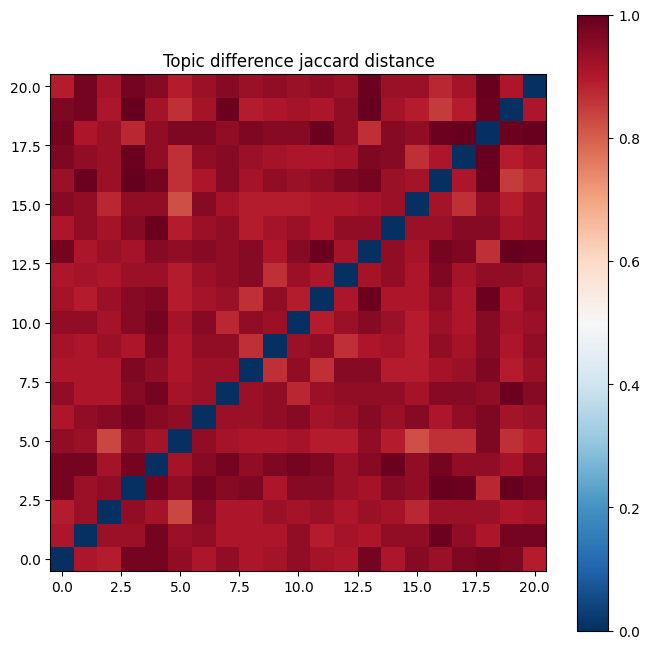

In [ ]:
mdiff, annotation = coherence_ldamodel.diff(coherence_ldamodel, distance='jaccard', num_words=50)
plot_difference_matplotlib(mdiff, title="Topic difference jaccard distance", annotation=annotation)

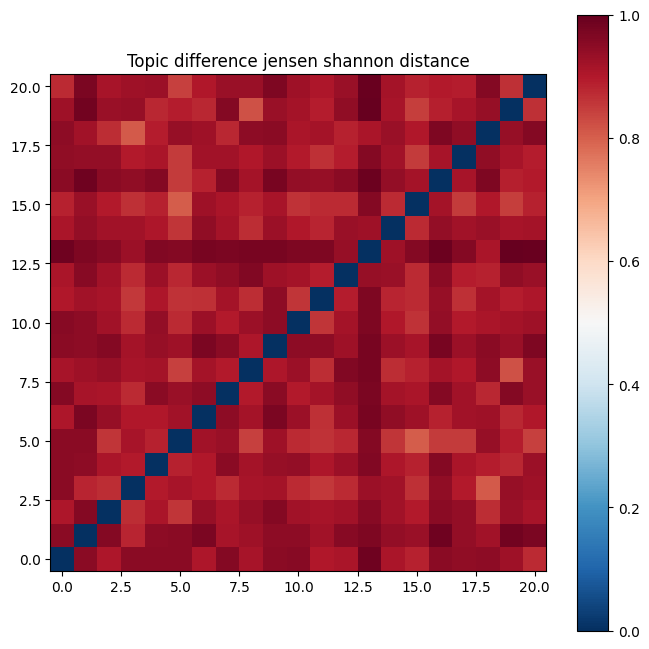

In [ ]:
mdiff, annotation = coherence_ldamodel.diff(coherence_ldamodel, distance='jensen_shannon', num_words=50)
plot_difference_matplotlib(mdiff, title="Topic difference jensen shannon distance", annotation=annotation)